## Breast cancer Prediction using ANN

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

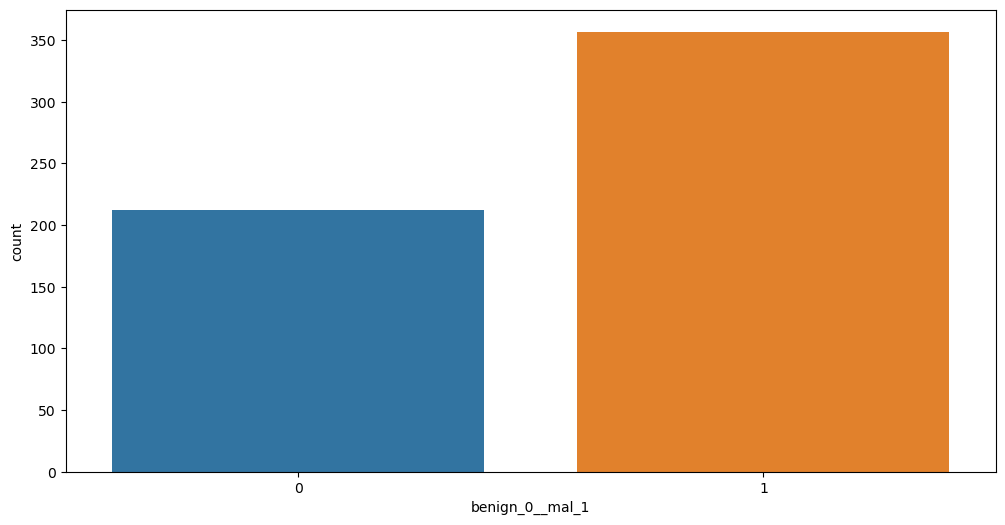

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

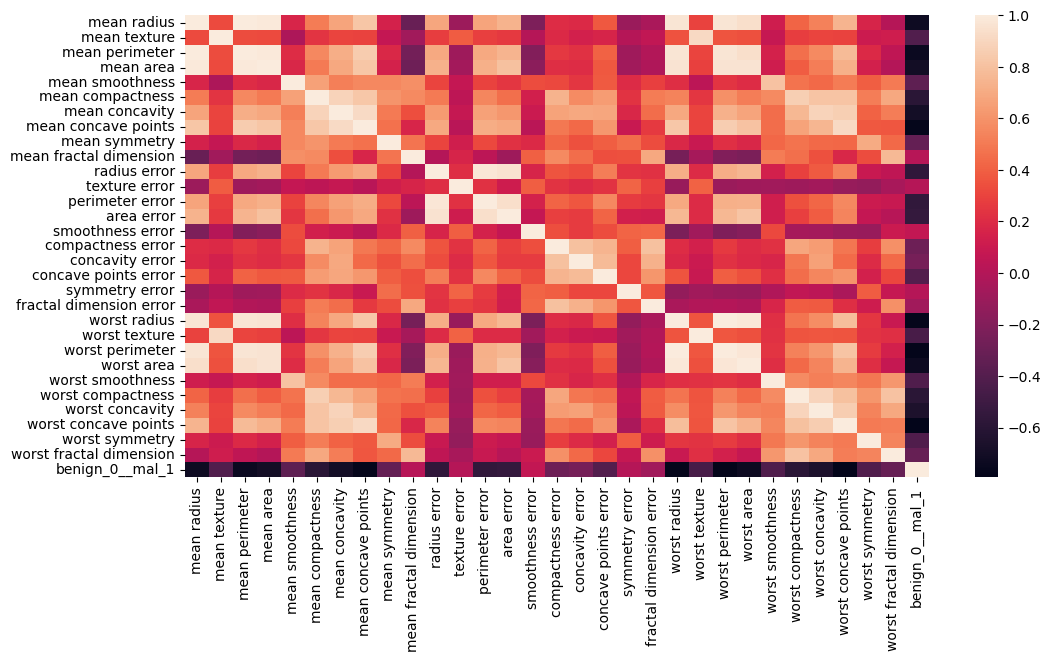

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr())

In [11]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

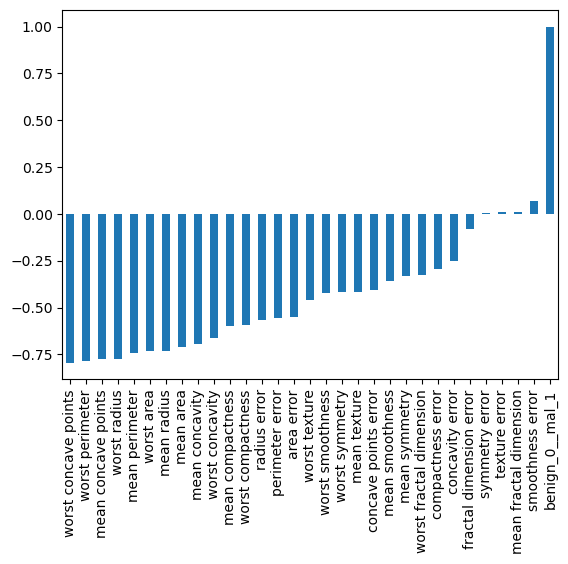

In [12]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<AxesSubplot:>

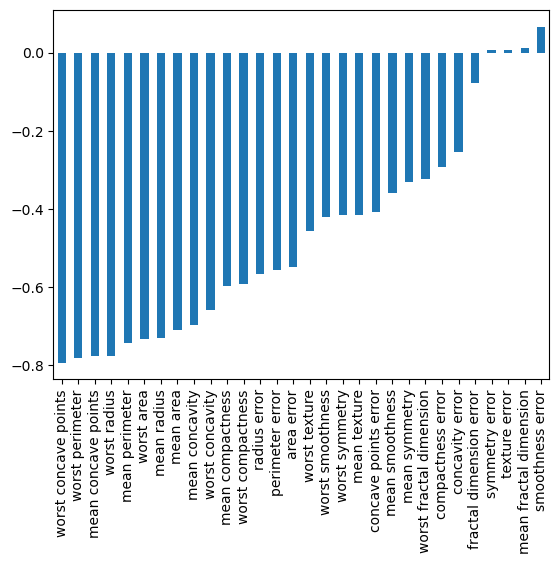

In [13]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [14]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(X_train)

MinMaxScaler()

In [20]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
accuracy=dict()

### Logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [23]:
pred=classifier.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(pred,y_test))
print(confusion_matrix(pred,y_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        51
           1       1.00      0.96      0.98        92

    accuracy                           0.97       143
   macro avg       0.96      0.98      0.97       143
weighted avg       0.97      0.97      0.97       143

[[51  0]
 [ 4 88]]


In [25]:
from sklearn.metrics import accuracy_score
accuracy['Logistic Regression']=accuracy_score(pred,y_test)

### K-nearest Neighbours

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn=KNeighborsClassifier(n_neighbors=1)

In [28]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [29]:
knn.score(X_train,y_train)

1.0

In [30]:
#For K=2
knn=KNeighborsClassifier(n_neighbors=2)

In [31]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [32]:
knn.score(X_train,y_train)

0.9741784037558685

In [33]:
#find the best K value
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_train)
    error_rate.append(np.mean(pred_i != y_train))

Text(0, 0.5, 'Error Rate')

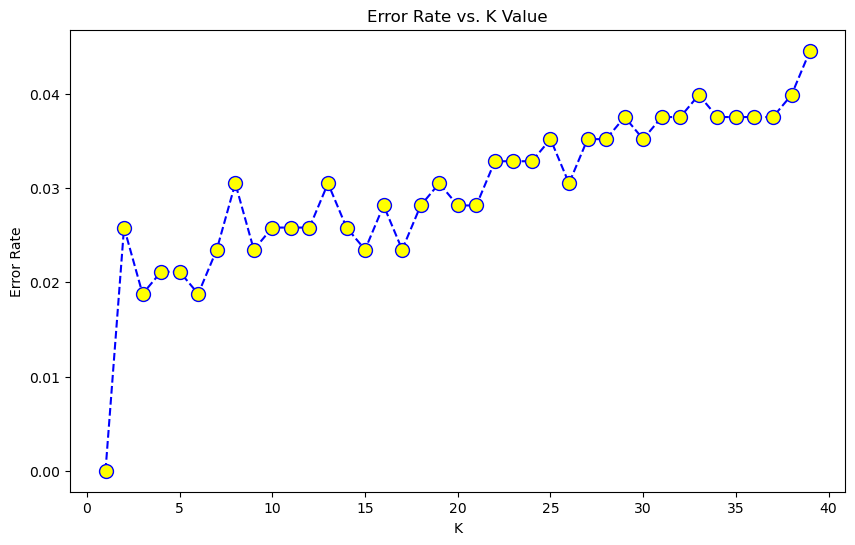

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate') #error rate differs as the k value increases

In [35]:
#for k=2 is best suitable
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(classification_report(pred,y_test))
print(confusion_matrix(pred,y_test))
accuracy['KNN']=accuracy_score(pred,y_test)

              precision    recall  f1-score   support

           0       0.98      0.87      0.92        62
           1       0.91      0.99      0.95        81

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

[[54  8]
 [ 1 80]]


### Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
print(classification_report(pred,y_test))
print(confusion_matrix(pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        57
           1       0.93      0.95      0.94        86

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.93       143
weighted avg       0.93      0.93      0.93       143

[[51  6]
 [ 4 82]]


In [37]:
accuracy['Naive Bayes']=accuracy_score(pred,y_test)

### Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
print(classification_report(pred,y_test))
print(confusion_matrix(pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        55
           1       0.94      0.94      0.94        88

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143

[[50  5]
 [ 5 83]]


In [39]:
accuracy['Decision Tree']=accuracy_score(pred,y_test)

### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        55
           1       0.98      0.95      0.97        88

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

[[53  2]
 [ 4 84]]


In [41]:
#find the best tree value
error_rate = []

for i in range(1,40):
    rfc = RandomForestClassifier(n_estimators=i,criterion='entropy',random_state=0)
    rfc.fit(X_train,y_train)
    pred_i = rfc.predict(X_train)
    error_rate.append(np.mean(pred_i != y_train))

Text(0, 0.5, 'Error Rate')

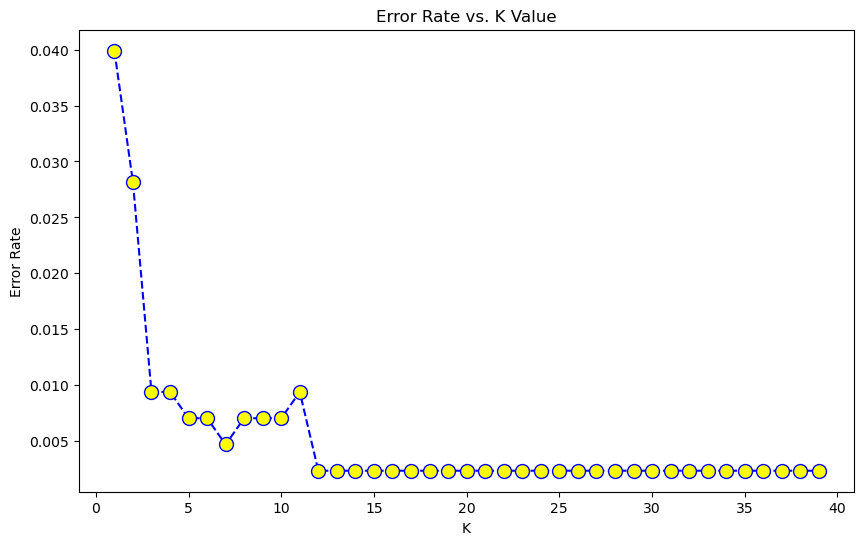

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate') #error rate decrease as the tree value increases

In [43]:
rfc = RandomForestClassifier(n_estimators=12,criterion='entropy',random_state=0)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143

[[54  1]
 [ 4 84]]


In [44]:
accuracy['Random Forest Classifier']=accuracy_score(predictions,y_test)

### Ada Boosting

In [45]:
from sklearn.ensemble import AdaBoostClassifier
clf=DecisionTreeClassifier(criterion='entropy',random_state=0) #lowest accuracy score
abc=AdaBoostClassifier(n_estimators=100,learning_rate=1,base_estimator=clf)
model=abc.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        57
           1       0.93      0.95      0.94        86

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.93       143
weighted avg       0.93      0.93      0.93       143

[[51  6]
 [ 4 82]]


In [46]:
accuracy['AdaBoosting']=accuracy_score(y_pred,y_test)

### Bagging Classfier

In [47]:
from sklearn.ensemble import BaggingClassifier
cart=DecisionTreeClassifier()
num_trees=100
model=BaggingClassifier(base_estimator=cart,n_estimators=num_trees,random_state=7)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
accuracy['Bagging']=accuracy_score(y_pred,y_test)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        55
           1       0.98      0.98      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

[[53  2]
 [ 2 86]]


In [46]:
accuracy

{'Logistic Regression': 0.972027972027972,
 'KNN': 0.9370629370629371,
 'Naive Bayes': 0.9300699300699301,
 'Decision Tree': 0.9300699300699301,
 'Random Forest Classifier': 0.965034965034965,
 'AdaBoosting': 0.9440559440559441,
 'Bagging': 0.972027972027972}

## Creating the Model

## For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [48]:
X_train.shape

(426, 30)

In [49]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [50]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 5s 32ms/step - loss: 0.6850 - val_loss: 0.6621
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6462 - val_loss: 0.6252
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6057 - val_loss: 0.5802
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5587 - val_loss: 0.5299
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5085 - val_loss: 0.4793
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4593 - val_loss: 0.4296
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4141 - val_loss: 0.3869
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3718 - val_loss: 0.3465
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3334 - val_loss: 0.3136
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3034 - val_loss: 0.2823
Epoch 11

14/14 [==============================] - 0s 5ms/step - loss: 0.0538 - val_loss: 0.1300
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0540 - val_loss: 0.1319
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0540 - val_loss: 0.1341
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0537 - val_loss: 0.1299
Epoch 87/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0542 - val_loss: 0.1284
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0526 - val_loss: 0.1312
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0515 - val_loss: 0.1351
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0507 - val_loss: 0.1303
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0518 - val_loss: 0.1286
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0518 - val_loss: 0.1407
Epoch 93/600


14/14 [==============================] - 0s 4ms/step - loss: 0.0400 - val_loss: 0.1372
Epoch 165/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0385 - val_loss: 0.1448
Epoch 166/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0372 - val_loss: 0.1341
Epoch 167/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0378 - val_loss: 0.1456
Epoch 168/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0366 - val_loss: 0.1341
Epoch 169/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0369 - val_loss: 0.1413
Epoch 170/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0384 - val_loss: 0.1379
Epoch 171/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0365 - val_loss: 0.1388
Epoch 172/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0365 - val_loss: 0.1456
Epoch 173/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0361 - val_loss: 0.1432
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0275 - val_loss: 0.1397
Epoch 246/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0273 - val_loss: 0.1408
Epoch 247/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0291 - val_loss: 0.1516
Epoch 248/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0281 - val_loss: 0.1415
Epoch 249/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0295 - val_loss: 0.1546
Epoch 250/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0365 - val_loss: 0.1388
Epoch 251/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0253 - val_loss: 0.1535
Epoch 252/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0269 - val_loss: 0.1471
Epoch 253/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0268 - val_loss: 0.1450
Epoch 254/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0305 - val_loss: 0.1394
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0216 - val_loss: 0.1478
Epoch 327/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0204 - val_loss: 0.1659
Epoch 328/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0200 - val_loss: 0.1615
Epoch 329/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0189 - val_loss: 0.1724
Epoch 330/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0193 - val_loss: 0.1520
Epoch 331/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0188 - val_loss: 0.1721
Epoch 332/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0193 - val_loss: 0.1486
Epoch 333/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0230 - val_loss: 0.1660
Epoch 334/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0255 - val_loss: 0.1561
Epoch 335/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0212 - val_loss: 0.1617
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0130 - val_loss: 0.1795
Epoch 408/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0135 - val_loss: 0.1805
Epoch 409/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0127 - val_loss: 0.1818
Epoch 410/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0139 - val_loss: 0.1744
Epoch 411/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0129 - val_loss: 0.1897
Epoch 412/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0137 - val_loss: 0.1802
Epoch 413/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0125 - val_loss: 0.1856
Epoch 414/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0124 - val_loss: 0.1852
Epoch 415/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0140 - val_loss: 0.1936
Epoch 416/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0146 - val_loss: 0.1744
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0094 - val_loss: 0.2311
Epoch 489/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0102 - val_loss: 0.2072
Epoch 490/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0088 - val_loss: 0.2367
Epoch 491/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0106 - val_loss: 0.2053
Epoch 492/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0082 - val_loss: 0.2140
Epoch 493/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0082 - val_loss: 0.2144
Epoch 494/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0087 - val_loss: 0.2233
Epoch 495/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0089 - val_loss: 0.2196
Epoch 496/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0096 - val_loss: 0.2070
Epoch 497/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0086 - val_loss: 0.2231
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0058 - val_loss: 0.2744
Epoch 570/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0065 - val_loss: 0.2632
Epoch 571/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0055 - val_loss: 0.2684
Epoch 572/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0073 - val_loss: 0.2636
Epoch 573/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0061 - val_loss: 0.2827
Epoch 574/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0070 - val_loss: 0.2726
Epoch 575/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0065 - val_loss: 0.2753
Epoch 576/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0065 - val_loss: 0.2804
Epoch 577/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0062 - val_loss: 0.2750
Epoch 578/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0052 - val_loss: 0.2765
Epoc

In [51]:
l=list(model.history.history['val_loss'])
print("The maximum validation loss is ",max(l),"\nThe minimum validation loss is",min(l))

The maximum validation loss is  0.6621464490890503 
The minimum validation loss is 0.12392142415046692


In [52]:
model_loss = pd.DataFrame(model.history.history)

In [53]:
model_loss.head()

,loss,val_loss
0,0.685029,0.662146
1,0.646165,0.625158
2,0.605741,0.580238
3,0.558658,0.529949
4,0.508532,0.479278


<AxesSubplot:>

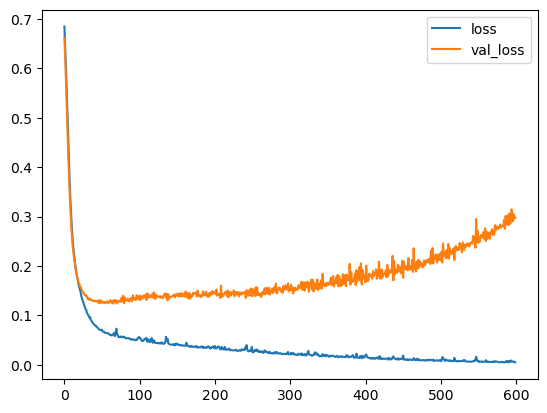

In [54]:
model_loss.plot()

In [55]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [57]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [58]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 20ms/step - loss: 0.6603 - val_loss: 0.6464
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6283 - val_loss: 0.6131
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5904 - val_loss: 0.5671
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5387 - val_loss: 0.5107
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4802 - val_loss: 0.4470
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4217 - val_loss: 0.3863
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3685 - val_loss: 0.3357
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3252 - val_loss: 0.2916
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2927 - val_loss: 0.2587
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2604 - val_loss: 0.2320
Epoch 11

<AxesSubplot:>

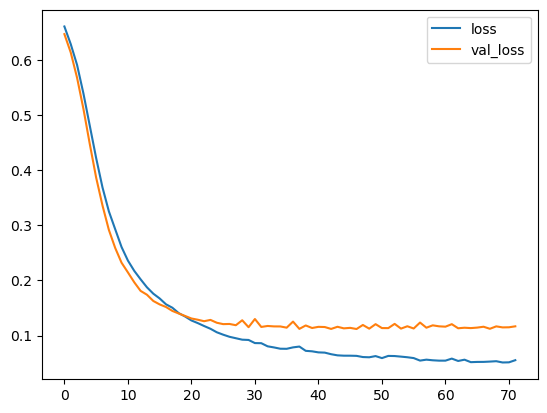

In [59]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [60]:
from tensorflow.keras.layers import Dropout

In [61]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [62]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 3s 17ms/step - loss: 0.6729 - val_loss: 0.6536
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6838 - val_loss: 0.6401
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6558 - val_loss: 0.6300
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6305 - val_loss: 0.6154
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6267 - val_loss: 0.5967
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6096 - val_loss: 0.5751
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5946 - val_loss: 0.5545
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5830 - val_loss: 0.5301
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5609 - val_loss: 0.5050
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5367 - val_loss: 0.4831
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.1181 - val_loss: 0.0948
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1076 - val_loss: 0.1028
Epoch 85/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1172 - val_loss: 0.0937
Epoch 86/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1168 - val_loss: 0.0966
Epoch 87/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1270 - val_loss: 0.1123
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1087 - val_loss: 0.0914
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1135 - val_loss: 0.0904
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0988 - val_loss: 0.1036
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1203 - val_loss: 0.0999
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1236 - val_loss: 0.0881
Epoch 93/600


<AxesSubplot:>

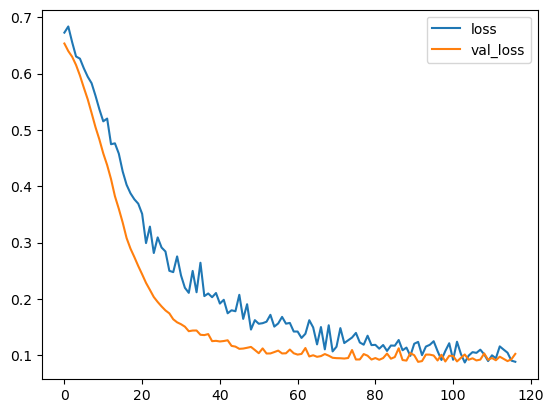

In [63]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [64]:
predictions=(model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 3s 2ms/step


In [65]:
from sklearn.metrics import classification_report,confusion_matrix

In [66]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [67]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]


In [68]:
accuracy['ANN']=accuracy_score(y_test,predictions)

In [69]:
accuracy

{'Logistic Regression': 0.972027972027972,
 'KNN': 0.9370629370629371,
 'Naive Bayes': 0.9300699300699301,
 'Decision Tree': 0.9300699300699301,
 'Random Forest Classifier': 0.965034965034965,
 'AdaBoosting': 0.9300699300699301,
 'Bagging': 0.972027972027972,
 'ANN': 0.9790209790209791}

In [73]:
color=['blue','black','yellow','green','red','pink','violet','gold']

<BarContainer object of 8 artists>

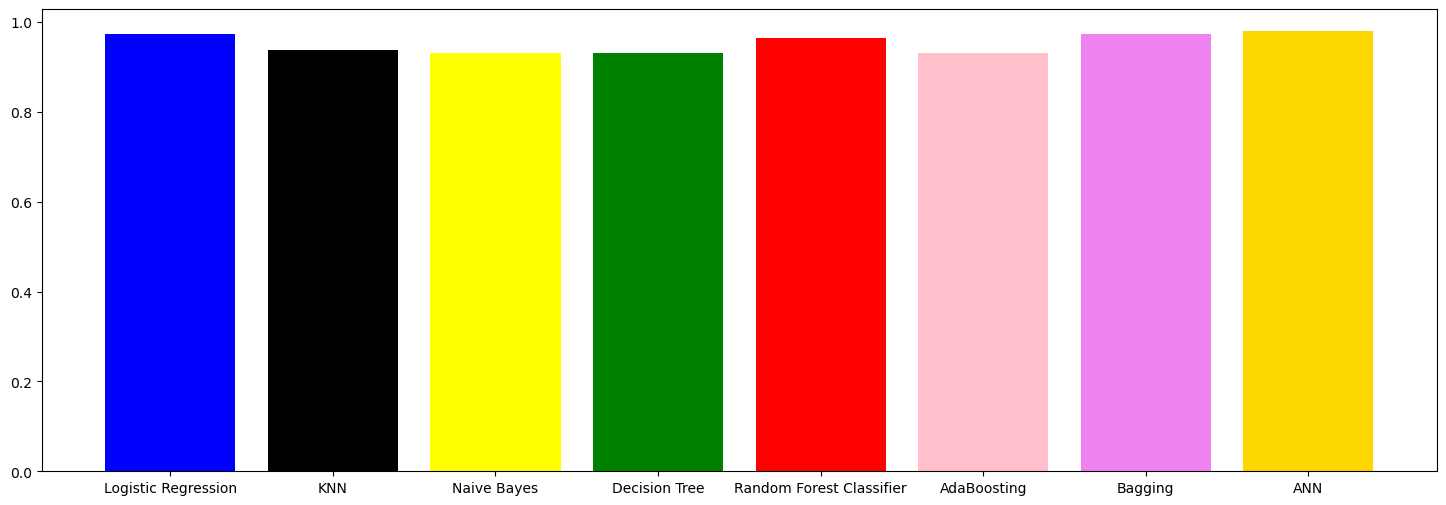

In [76]:
plt.figure(figsize=(18,6))
plt.bar(x=accuracy.keys(),height=accuracy.values(),color=color)

### Save the model in JSON format and weights in h5 format

In [ ]:
model_json=model.to_json()

In [ ]:
with open("model_ann.json","w") as json_file:
    json_file.write(model_json)

In [ ]:
model.save_weights("model_ann_weights.h5")

### Predict the new feature target value

In [ ]:
val=list(df.iloc(0)[0])

In [ ]:
df.iloc(0)[0]

In [ ]:
X_test[0]

In [ ]:
val=np.array(val[:30])

In [ ]:
val.shape

In [ ]:
val=scaler.transform([val])

In [ ]:
p=(model.predict(val) > 0.5).astype("int32")

In [ ]:
p[0][0]